# pandas Basics
__[**pandas**](https://pandas.pydata.org/)__ is a library providing fast, flexible, and expressive data structures for data analysis in Python.

## Main Features
* pandas has two primary data structures, Series (1-dimensional) and DataFrame (2-dimensional). 
* For R users, DataFrame provides everything that R’s data.frame provides and much more. 
* pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format

## Read Data
It's very easy to read data from excel files:

In [1]:
###### IMPORTATION of CSV FILES ######
import numpy as np
import pandas as pd

deposits = pd.read_csv('MktData_CurveBootstrap.csv', index_col=0, skiprows = 9, usecols = np.arange(3,6))
deposits = deposits[:6]
deposits.index = pd.to_datetime(deposits.index)

print(deposits)

               BID     ASK
Depos                     
2008-02-20  3.9900  4.0300
2008-02-26  4.0500  4.0900
2008-03-19  4.1300  4.1800
2008-04-21  4.2100  4.2700
2008-05-19  4.3000  4.3600
2008-08-19  4.2900  4.3500


In [2]:
# the result is a DataFrame
print(type(deposits))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# the first column is used as label for the rows
print(deposits.shape)

(6, 2)


In [4]:
# the axes of the DataFrame are the row labels and the column labels
print(deposits.axes)

[DatetimeIndex(['2008-02-20', '2008-02-26', '2008-03-19', '2008-04-21',
               '2008-05-19', '2008-08-19'],
              dtype='datetime64[ns]', name='Depos', freq=None), Index(['BID', 'ASK'], dtype='object')]


In [5]:
# we can access the dates by using the axes attribute
dates = deposits.axes[0].tolist()

print(dates)
print(dates.index)

[Timestamp('2008-02-20 00:00:00'), Timestamp('2008-02-26 00:00:00'), Timestamp('2008-03-19 00:00:00'), Timestamp('2008-04-21 00:00:00'), Timestamp('2008-05-19 00:00:00'), Timestamp('2008-08-19 00:00:00')]
<built-in method index of list object at 0x127a77b40>


## Access Data
There are many ways to access the data in a DataFrame, we'll see only some of them.

### Select a single column

In [6]:
bids = deposits['BID']
print(bids)

Depos
2008-02-20    3.9900
2008-02-26    4.0500
2008-03-19    4.1300
2008-04-21    4.2100
2008-05-19    4.3000
2008-08-19    4.2900
Name: BID, dtype: object


In [7]:
print(type(bids))

<class 'pandas.core.series.Series'>


### Select some rows (slicing)

In [8]:
print(deposits[3:])

               BID     ASK
Depos                     
2008-04-21  4.2100  4.2700
2008-05-19  4.3000  4.3600
2008-08-19  4.2900  4.3500


### Select by Labels
There is an ad-hoc method for selecting the data by label: **loc**.

In [9]:
# select specific columns by label
print(deposits.loc[:,['ASK', 'BID']])

               ASK     BID
Depos                     
2008-02-20  4.0300  3.9900
2008-02-26  4.0900  4.0500
2008-03-19  4.1800  4.1300
2008-04-21  4.2700  4.2100
2008-05-19  4.3600  4.3000
2008-08-19  4.3500  4.2900


In [10]:
print(type(deposits.loc[:,['ASK', 'BID']]))

<class 'pandas.core.frame.DataFrame'>


In [11]:
# select specific value
print(deposits.loc[dates[0], 'ASK'])

4.0300


In [12]:
print(type(deposits.loc[dates[0], 'ASK']))

<class 'str'>


### Select by Position
There is an ad-hoc method for selecting the data by position: **iloc**.

In [13]:
# select single row
print(deposits.iloc[3])

BID    4.2100
ASK    4.2700
Name: 2008-04-21 00:00:00, dtype: object


In [14]:
print(type(deposits.iloc[3]))

<class 'pandas.core.series.Series'>


In [15]:
# slicing
print(deposits.iloc[3:5, 1:])

               ASK
Depos             
2008-04-21  4.2700
2008-05-19  4.3600


In [16]:
print(type(deposits.iloc[3:5, 1:]))

<class 'pandas.core.frame.DataFrame'>


In [17]:
# select specific value
print(deposits.iloc[1, 1])

4.0900


#Warning: aliasing

In [18]:
# Extracting a time series
ts_ask = deposits["ASK"]

In [19]:
# Modifying a value
ts_ask[0] = 4.44

print(ts_ask)
print(deposits)

Depos
2008-02-20      4.44
2008-02-26    4.0900
2008-03-19    4.1800
2008-04-21    4.2700
2008-05-19    4.3600
2008-08-19    4.3500
Name: ASK, dtype: object
               BID     ASK
Depos                     
2008-02-20  3.9900    4.44
2008-02-26  4.0500  4.0900
2008-03-19  4.1300  4.1800
2008-04-21  4.2100  4.2700
2008-05-19  4.3000  4.3600
2008-08-19  4.2900  4.3500


In [20]:
# Creating a copy of the time series
ts_ask = deposits["ASK"].copy()
ts_bid = deposits["ASK"].copy()

# How to make plots? Matplotlib

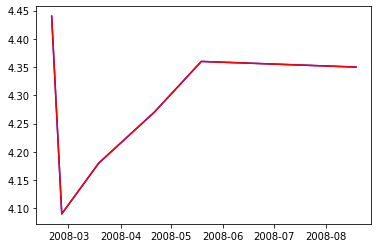

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ts_ask, color="blue")
plt.plot(ts_bid, color="red")
plt.show()


## Other Resources
* __[pandas Official Documentation](http://pandas.pydata.org/pandas-docs/stable/)__
* __[matplotlib Official Documentation](https://matplotlib.org/3.5.1/)__
* __[scipy Official Documentation](https://docs.scipy.org/doc/scipy/)__